In [1]:
#Topic Modelling for a corpus of PubMed Papers
#2239 Documents converted into a .csv corpus
#Preprocessing the text
#Coherence Score Calculated
#Topic-Document matrix output

In [2]:
import functions

In [3]:
functions.outputs.make_csv("/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/separated_pdfs", "txt")

In [4]:
#csv called corpus.csv saved to current working directory

In [5]:
import pandas as pd
import csv

df=pd.read_csv('corpus.csv', encoding = 'unicode_escape', encoding_errors = 'ignore', engine ='c')
df.head()

,name,text
0,10025429.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
1,10051932.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
2,10084544.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
3,10100568.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
4,10187866.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...


In [6]:
df['processed_text'] = df['text'].apply(functions.processing.preprocess)
df.head()

,name,text,processed_text
0,10025429.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[monitor, venous, hemodynamic, patient, cerebr..."
1,10051932.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[binderpagetif, report, investigation, epidura..."
2,10084544.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[short, reporteeg, finding, dementia, lewy, bo..."
3,10100568.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[bmtpbone, marrow, transplantation, stockton, ..."
4,10187866.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[stroke, unit, natural, habitatstroke, unit, n..."


In [7]:
df["word_count"] = df["processed_text"].apply(lambda x: len(x))
#add in a line to remove 0 wc texts
df = df[~(df.word_count == 0)]


df.head()

,name,text,processed_text,word_count
0,10025429.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[monitor, venous, hemodynamic, patient, cerebr...",1987
1,10051932.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[binderpagetif, report, investigation, epidura...",1733
2,10084544.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[short, reporteeg, finding, dementia, lewy, bo...",1285
3,10100568.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[bmtpbone, marrow, transplantation, stockton, ...",867
4,10187866.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[stroke, unit, natural, habitatstroke, unit, n...",2359


In [8]:
# Descriptive statistics for word count
df['word_count'].describe()
#95%CI Calculated: 

count     2177.000000
mean      2421.255397
std       1683.499273
min          8.000000
25%       1208.000000
50%       2076.000000
75%       3171.000000
max      20143.000000
Name: word_count, dtype: float64

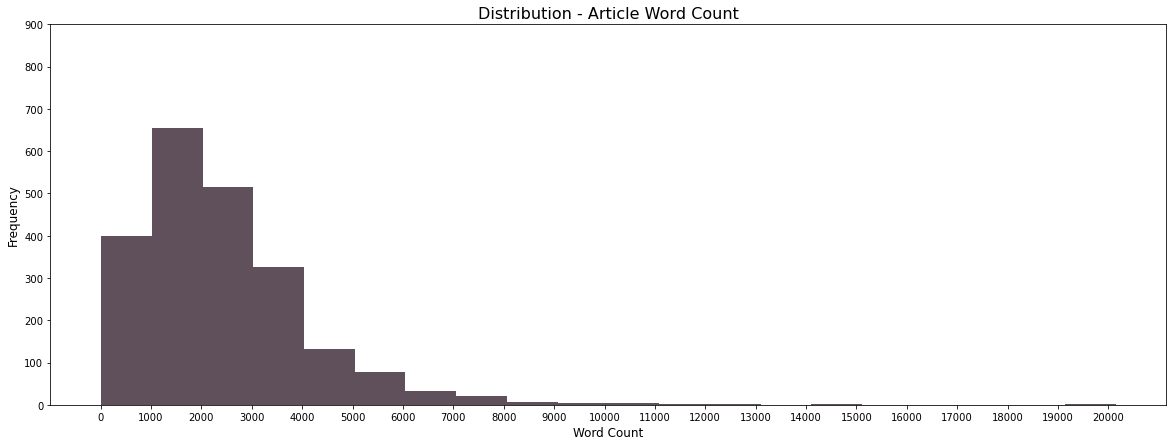

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plot a hist of the word counts
fig = plt.figure(figsize=(20,7))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 1000, 100))
plt.xticks(np.arange(0, 21000, 1000))

file_name = 'hist'

plt.show()

In [10]:
from collections import Counter

# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,patient,75078
1,study,34259
2,brain,23404
3,consciousness,18746
4,case,16703
5,clinical,15825
6,group,15267
7,show,14827
8,report,14445
9,level,13759


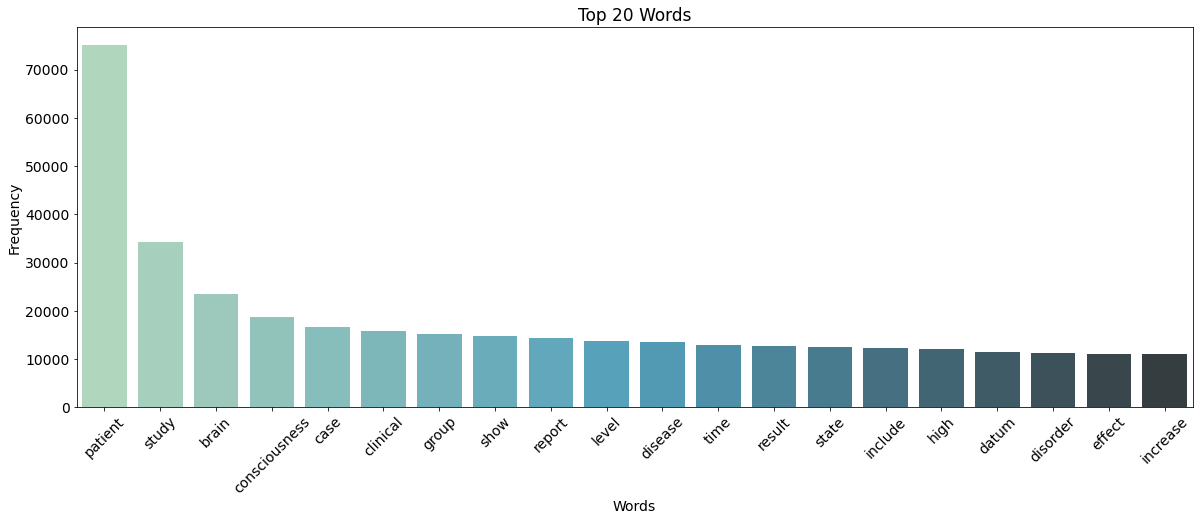

In [11]:
import seaborn as sns

# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)

plt.show()

In [12]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

541218

In [13]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter

In [14]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = df['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below = 3,
    no_above=0.85,
    #keep_n=5000, removed so that we're not setting a limit for number of words
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

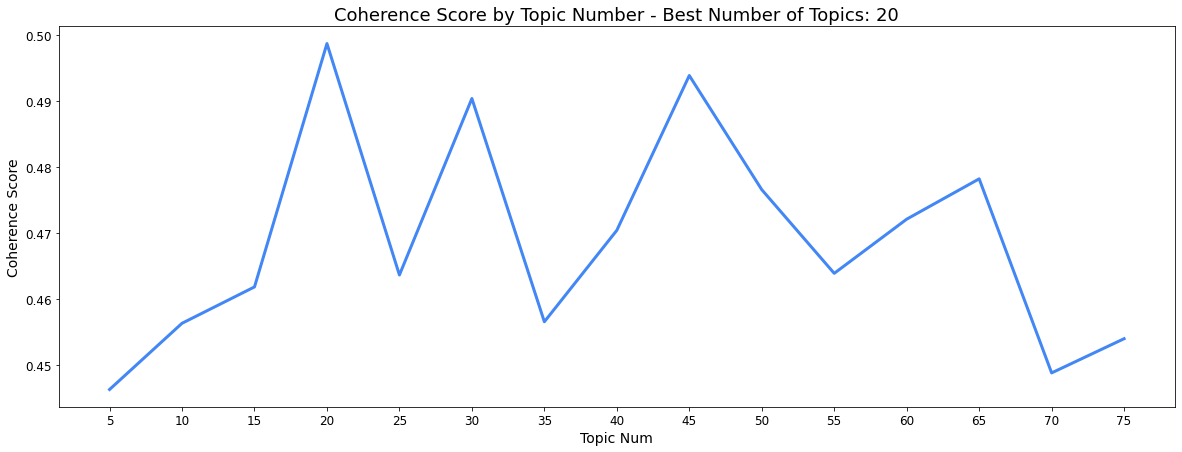

In [15]:
# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(20, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [16]:
# Now use the number of topics with the 
# highest coherence score to run the 
# sklearn nmf model

texts = df['processed_text']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    #max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [17]:
#functions for creating topic display table 

from nltk.tokenize import TweetTokenizer, RegexpTokenizer

def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)

def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]  

def whitespace_tokenizer(text): 
    pattern = r"(?u)\b\w\w+\b" 
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens

# Funtion to remove duplicate words
def unique_words(text): 
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist

In [18]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 8

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head(best_num_topics)

,0,1,2,3,4,5,6,7,topics
0,case,liver,mgdl,serum,day,disease,blood,level,case liver mgdl serum day disease blood level
1,mcs,doc,crsr,uws,vegetative,vsuws,state,disorder consciousness,mcs doc crsr uws vegetative vsuws state disord...
2,stroke,ischemic,infarction,nihss,ischemic stroke,acute,stroke patient,acute stroke,stroke ischemic infarction nihss acute patient
3,covid,sarscov,coronavirus,infection,covid patient,disease,respiratory,neurological,covid sarscov coronavirus infection patient di...
4,health,life,care,participant,family,social,group,treatment,health life care participant family social gro...
5,connectivity,network,brain,functional,dmn,cortex,functional connectivity,region,connectivity network brain functional dmn cort...
6,encephalitis,antinmdar,antinmdar encephalitis,antibody,receptor,antibodie,autoimmune,csf,encephalitis antinmdar antibody receptor antib...
7,tbi,injury,traumatic,brain injury,brain,score,traumatic brain,mtbi,tbi injury traumatic brain score mtbi
8,seizure,eeg,epilepsy,ictal,epileptic,ncse,child,false,seizure eeg epilepsy ictal epileptic ncse chil...
9,syncope,vasovagal,tilt,cardiac,heart,sinus,orthostatic,ecg,syncope vasovagal tilt cardiac heart sinus ort...


In [19]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df #There should be 10 topics based on coherence test

,topic_num,topics
0,0,case liver mgdl serum day disease blood level
1,1,mcs doc crsr uws vegetative vsuws state disord...
2,2,stroke ischemic infarction nihss acute patient
3,3,covid sarscov coronavirus infection patient di...
4,4,health life care participant family social gro...
5,5,connectivity network brain functional dmn cort...
6,6,encephalitis antinmdar antibody receptor antib...
7,7,tbi injury traumatic brain score mtbi
8,8,seizure eeg epilepsy ictal epileptic ncse chil...
9,9,syncope vasovagal tilt cardiac heart sinus ort...


In [20]:
# Creating a temp df with the url and topic num to join on
name = df['name'].tolist()

df_temp = pd.DataFrame({
    'name': name,
    'topic_num': docweights.argmax(axis=1)
})

# Merging to get the topic num with url
merged_topic = df_temp.merge(
    topic_df,
    on='topic_num',
    how='left'
)

# Merging with the original df
df_topics = pd.merge(
    df,
    merged_topic,
    on='name',
    how='left'
)

df_topics = df_topics.drop(
    'text',
    axis=1
)

df_topics.head(10)

,name,processed_text,word_count,topic_num,topics
0,10025429.txt,"[monitor, venous, hemodynamic, patient, cerebr...",1987,11,artery aneurysm occlusion hemorrhage basilar c...
1,10051932.txt,"[binderpagetif, report, investigation, epidura...",1733,13,meningitis malaria child infection csf virus b...
2,10084544.txt,"[short, reporteeg, finding, dementia, lewy, bo...",1285,8,seizure eeg epilepsy ictal epileptic ncse chil...
3,10100568.txt,"[bmtpbone, marrow, transplantation, stockton, ...",867,18,lesion mri pre image reversible encephalopathy...
4,10187866.txt,"[stroke, unit, natural, habitatstroke, unit, n...",2359,2,stroke ischemic infarction nihss acute patient
5,10214071.txt,"[mri, key, word, avm, mgdl, mgdl, mgdl, mmhg, ...",436,11,artery aneurysm occlusion hemorrhage basilar c...
6,10220461.txt,"[pqpproc, natl, acad, sci, usavol, april, phys...",2782,5,connectivity network brain functional dmn cort...
7,10229734.txt,"[ischemic, strokeischemic, strokeimpact, recen...",1444,2,stroke ischemic infarction nihss acute patient
8,10321211.txt,"[orimtpinternational, vol, xxivno, fourpatient...",2514,4,health life care participant family social gro...
9,10390303.txt,"[hemorrhagic, transformation, acute, ischemic,...",2011,2,stroke ischemic infarction nihss acute patient


In [47]:
# Creating a temp df with the url and topic num to join on
name = df['name'].tolist()

df_temp = pd.DataFrame({
    'name': name,
    'topic_num': docweights.size
})

# Merging to get the topic num with url
merged_topic = df_temp.merge(
    topic_df,
    on='topic_num',
    how='left'
)

# Merging with the original df
df_topics = pd.merge(
    df,
    merged_topic,
    on='name',
    how='left'
)

df_topics = df_topics.drop(
    'text',
    axis=1
)

df_topics.head(10)

,name,processed_text,word_count,topic_num,topics
0,10025429.txt,"[monitor, venous, hemodynamic, patient, cerebr...",1987,43540,NaN
1,10051932.txt,"[binderpagetif, report, investigation, epidura...",1733,43540,NaN
2,10084544.txt,"[short, reporteeg, finding, dementia, lewy, bo...",1285,43540,NaN
3,10100568.txt,"[bmtpbone, marrow, transplantation, stockton, ...",867,43540,NaN
4,10187866.txt,"[stroke, unit, natural, habitatstroke, unit, n...",2359,43540,NaN
5,10214071.txt,"[mri, key, word, avm, mgdl, mgdl, mgdl, mmhg, ...",436,43540,NaN
6,10220461.txt,"[pqpproc, natl, acad, sci, usavol, april, phys...",2782,43540,NaN
7,10229734.txt,"[ischemic, strokeischemic, strokeimpact, recen...",1444,43540,NaN
8,10321211.txt,"[orimtpinternational, vol, xxivno, fourpatient...",2514,43540,NaN
9,10390303.txt,"[hemorrhagic, transformation, acute, ischemic,...",2011,43540,NaN


In [21]:
# Showing the 3 matrices we get witn nmf
A = tfidf_vectorizer.transform(texts) 
W = nmf.components_
H = nmf.transform(A)

print('A = {} x {}'.format(A.shape[0], A.shape[1])) #Document x Term
print('W = {} x {}'.format(W.shape[0], W.shape[1])) #Topic x Term
print('H = {} x {}'.format(H.shape[0], H.shape[1])) # Document x Topic

A = 2177 x 255022
W = 20 x 255022
H = 2177 x 20


In [22]:
#Save it
df_topics.to_csv('H_DocumentTopicMatrix.csv')
topic_df.to_csv("TopicList.csv")

In [23]:
#remove empty "processed_text" strings that are non-english
print("Initial number of papers: {}".format(len(df)))

#remove all texts that don't align with relevant topics
df_relevant = df_topics[(df_topics.topics == "mcs doc crsr uws vegetative vsuws state disorder consciousness")]
df_relevant = df_relevant.append(df_topics[(df_topics.topics == "connectivity network brain functional dmn cortex region")])
df_relevant = df_relevant.append(df_topics[(df_topics.topics == "tbi injury traumatic brain score mtbi")])



print("Irrelevant papers removed: {}".format(len(df) - len(df_relevant)))
print("Papers Remaining: {}".format(len(df_relevant)))
df_relevant.head(10)

Initial number of papers: 2177
Irrelevant papers removed: 1810
Papers Remaining: 367


,name,processed_text,word_count,topic_num,topics
74,11839831.txt,"[special, articlecme, minimally, conscious, st...",2345,1,mcs doc crsr uws vegetative vsuws state disord...
164,15364679.txt,"[functional, imaging, severely, braininjured, ...",1589,1,mcs doc crsr uws vegetative vsuws state disord...
183,15671583.txt,"[nredvineurorehabilitation, pressthe, vegetati...",1723,1,mcs doc crsr uws vegetative vsuws state disord...
189,15864333.txt,"[inddeditorial, journal, clinical, investigati...",806,1,mcs doc crsr uws vegetative vsuws state disord...
296,18209196.txt,"[equal, deathavoide, diagnostic, error, brain,...",632,1,mcs doc crsr uws vegetative vsuws state disord...
307,18540151.txt,"[evaluate, brain, function, patient, disorder,...",1877,1,mcs doc crsr uws vegetative vsuws state disord...
331,18975482.txt,"[neuroimage, activation, study, vegetative, st...",1858,1,mcs doc crsr uws vegetative vsuws state disord...
350,19293420.txt,"[consciousness, coma, brain, deathcelebrating,...",974,1,mcs doc crsr uws vegetative vsuws state disord...
366,19622138.txt,"[biome, centralbmc, neurologyssopen, acceresea...",1779,1,mcs doc crsr uws vegetative vsuws state disord...
406,20113490.txt,"[review, open, accessimprove, clinical, assess...",2574,1,mcs doc crsr uws vegetative vsuws state disord...


In [24]:
df_relevant.to_csv('H_RelevantDocumentTopicMatrix.csv')

In [25]:
print("{} number of papers in topic 1".format(df_relevant[df_relevant.topic_num == 1].shape[0]))

165 number of papers in topic 1


In [26]:
print("{} number of papers in topic 5".format(df_relevant[df_relevant.topic_num == 5].shape[0]))

79 number of papers in topic 5


In [27]:
print("{} number of papers in topic 7".format(df_relevant[df_relevant.topic_num == 7].shape[0]))

123 number of papers in topic 7


In [28]:
df_relevant['word_count'].describe()

count      367.000000
mean      3228.005450
std       1851.872651
min        107.000000
25%       2204.000000
50%       3006.000000
75%       3854.000000
max      20143.000000
Name: word_count, dtype: float64